In [3]:
# 1) Design model (input size, output size, forward pass)
# 2) Construct loss and optimizer
# 3) Training loop
#    - forward pass: compute prediction and loss
#    - backward pass: gradients
#    - update weights

In [20]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [15]:
# 0) Prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], -1)

n_samples, n_features = X.shape

print(X.size())
print(y.size())

torch.Size([100, 1])
torch.Size([100, 1])


In [23]:
# model: y = wx + b
input_size = n_features
output_size = 1

# model = nn.Linear(input_size, output_size)

class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        # define layers
        self.lin = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.lin(x)

model = LinearRegression(input_size, output_size)

learning_rate = 0.01
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [24]:
# Training loop
n_iters = 200

for epoch in range(n_iters):
    # forward pass and loss
    y_pred = model(X)
    l = loss(y, y_pred)

    # backward pass
    l.backward()

    # update weights
    optimizer.step()
    # zero gradients
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        [W, b] = model.parameters()
        print(f'epoch {epoch+1}: W = {W[0].item(): 0.3f}, loss = {l: 0.8f}')

epoch 10: W =  12.572, loss =  4344.82910156
epoch 20: W =  22.860, loss =  3240.37719727
epoch 30: W =  31.625, loss =  2441.94165039
epoch 40: W =  39.095, loss =  1864.08105469
epoch 50: W =  45.462, loss =  1445.42114258
epoch 60: W =  50.889, loss =  1141.80725098
epoch 70: W =  55.518, loss =  921.42852783
epoch 80: W =  59.465, loss =  761.33319092
epoch 90: W =  62.832, loss =  644.94274902
epoch 100: W =  65.704, loss =  560.26666260
epoch 110: W =  68.155, loss =  498.62384033
epoch 120: W =  70.246, loss =  453.72183228
epoch 130: W =  72.032, loss =  420.99710083
epoch 140: W =  73.555, loss =  397.13519287
epoch 150: W =  74.856, loss =  379.72805786
epoch 160: W =  75.967, loss =  367.02416992
epoch 170: W =  76.915, loss =  357.74929810
epoch 180: W =  77.725, loss =  350.97567749
epoch 190: W =  78.417, loss =  346.02725220
epoch 200: W =  79.008, loss =  342.41104126


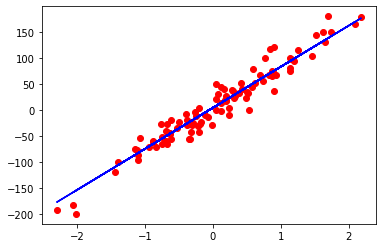

In [25]:
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, "ro")
plt.plot(X_numpy, predicted, "b")
plt.show()